In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [24]:
data = pd.read_csv("C:\\Users\\User\\Desktop\\ML Projects\\Decisiontrees\\data\\student-scores.csv")
data.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [26]:
data.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [27]:
data = data.drop(columns=['id','first_name','last_name','email'])

In [28]:
data['TOTAL_MARK'] = (data['math_score']+data['history_score']+data['physics_score']+data['chemistry_score']+data['biology_score']+data['english_score']+data['geography_score']) / 7

In [29]:
data = data.drop(columns=['math_score','history_score','physics_score','chemistry_score','biology_score','english_score','geography_score'])

In [30]:
data

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,TOTAL_MARK
0,male,False,3,False,27,Lawyer,82.000000
1,female,False,2,False,47,Doctor,91.428571
2,female,False,9,True,13,Government Officer,86.428571
3,female,False,5,False,3,Artist,78.714286
4,male,False,5,False,10,Unknown,74.428571
...,...,...,...,...,...,...,...
1995,male,False,2,False,30,Construction Engineer,79.714286
1996,male,False,2,False,20,Software Engineer,76.285714
1997,female,False,5,False,14,Software Engineer,82.571429
1998,female,True,10,True,5,Business Owner,80.857143


In [31]:
data['gender'] = data['gender'].replace({'male':0,'female':1})
data['part_time_job'] = data['part_time_job'].astype(int)
data['extracurricular_activities'] = data['extracurricular_activities'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_4060\3901148128.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'male':0,'female':1})


<Axes: xlabel='career_aspiration'>

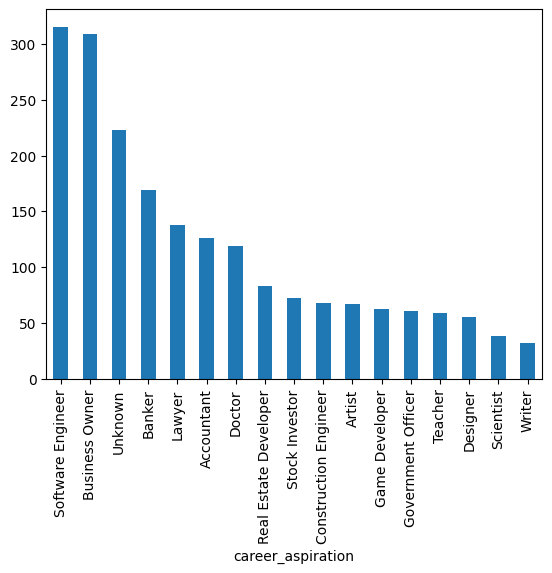

In [32]:
data['career_aspiration'].value_counts().plot(kind='bar')

In [33]:
labelencoder = LabelEncoder()
data['career_aspiration'] = labelencoder.fit_transform(data['career_aspiration'])

In [34]:
data["Result"] = data["TOTAL_MARK"].apply(lambda x: "Pass" if x >= 75 else "Fail")

In [40]:
data.drop(columns=['TOTAL_MARK'])

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,Result
0,0,0,3,0,27,9,Pass
1,1,0,2,0,47,6,Pass
2,1,0,9,1,13,8,Pass
3,1,0,5,0,3,1,Pass
4,0,0,5,0,10,15,Fail
...,...,...,...,...,...,...,...
1995,0,0,2,0,30,4,Pass
1996,0,0,2,0,20,12,Pass
1997,1,0,5,0,14,12,Pass
1998,1,1,10,1,5,3,Pass


In [44]:
data = data.drop(columns=['TOTAL_MARK'])

In [45]:
data.to_csv("data/cleaned_data.csv",index=False)